In [1]:
import tensorflow as tf

In [2]:
data_dir = "data/food-101/images/"

In [68]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('float32')

In [64]:
from tensorflow.keras.utils import image_dataset_from_directory

all_images = image_dataset_from_directory(directory=data_dir,
                                         label_mode="categorical",
                                         batch_size=32,
                                         image_size=(256, 256)
                                         )

Found 101000 files belonging to 101 classes.


In [65]:
len(all_images.class_names)

101

In [69]:
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0

data_aug =  Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
#     tf.keras.layers.Rescaling(1.0/255) # But not for the Efficient layer as its own Rescaling Layer

], name ="Data_Augmentation_Layer")

base_model = EfficientNetB0(include_top=False)
for i in base_model.layers[:-10]:
    i.trainable = False

ip = Input(shape=(256, 256, 3), name="Input_layer")
x = data_aug(ip)   
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name="Pooling_layer")(x)
op = Dense(101, activation="softmax", name="output_layer")(x)

food_vision_model = Model(ip, op)

In [70]:
food_vision_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 Data_Augmentation_Layer (Se  (None, 256, 256, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 1,022,613
Non-tra

In [71]:
food_vision_model.compile(loss="categorical_crossentropy",
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                         metrics=["accuracy"]
                         )

In [72]:
# Creating a model callBack Function
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_dir = "models/food_vision_model/"

checkpoint_callback = ModelCheckpoint(filepath=checkpoint_dir,
                                     save_best_only=True,
                                     save_weights_only=False,
                                     save_freq="epoch",
                                     monitor='loss')

In [74]:
food_vision_model.fit(all_images,
                     epochs=30,
                     steps_per_epoch=len(all_images),
                     callbacks=[checkpoint_callback])

Epoch 1/30
3157/3157 [==============================] - ETA: 0s - loss: 1.9760 - accuracy: 0.5078

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 1210s 382ms/step - loss: 1.9760 - accuracy: 0.5078
Epoch 2/30
3157/3157 [==============================] - ETA: 0s - loss: 1.4166 - accuracy: 0.6315

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 482s 152ms/step - loss: 1.4166 - accuracy: 0.6315
Epoch 3/30
3157/3157 [==============================] - ETA: 0s - loss: 1.2707 - accuracy: 0.6651

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 422s 133ms/step - loss: 1.2707 - accuracy: 0.6651
Epoch 4/30
3157/3157 [==============================] - ETA: 0s - loss: 1.1742 - accuracy: 0.6902

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 397s 125ms/step - loss: 1.1742 - accuracy: 0.6902
Epoch 5/30
3157/3157 [==============================] - ETA: 0s - loss: 1.1008 - accuracy: 0.7077

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 381s 121ms/step - loss: 1.1008 - accuracy: 0.7077
Epoch 6/30
3157/3157 [==============================] - ETA: 0s - loss: 1.0387 - accuracy: 0.7233

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 377s 119ms/step - loss: 1.0387 - accuracy: 0.7233
Epoch 7/30
3157/3157 [==============================] - ETA: 0s - loss: 0.9949 - accuracy: 0.7345

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 366s 116ms/step - loss: 0.9949 - accuracy: 0.7345
Epoch 8/30
3157/3157 [==============================] - ETA: 0s - loss: 0.9528 - accuracy: 0.7429

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 365s 116ms/step - loss: 0.9528 - accuracy: 0.7429
Epoch 9/30
3157/3157 [==============================] - ETA: 0s - loss: 0.9109 - accuracy: 0.7527

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 365s 116ms/step - loss: 0.9109 - accuracy: 0.7527
Epoch 10/30
3157/3157 [==============================] - ETA: 0s - loss: 0.8774 - accuracy: 0.7622

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 365s 116ms/step - loss: 0.8774 - accuracy: 0.7622
Epoch 11/30
3157/3157 [==============================] - ETA: 0s - loss: 0.8452 - accuracy: 0.7684

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 362s 114ms/step - loss: 0.8452 - accuracy: 0.7684
Epoch 12/30
3157/3157 [==============================] - ETA: 0s - loss: 0.8136 - accuracy: 0.7766

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 360s 114ms/step - loss: 0.8136 - accuracy: 0.7766
Epoch 13/30
3157/3157 [==============================] - ETA: 0s - loss: 0.7854 - accuracy: 0.7830

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 358s 113ms/step - loss: 0.7854 - accuracy: 0.7830
Epoch 14/30
3157/3157 [==============================] - ETA: 0s - loss: 0.7577 - accuracy: 0.7906

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 358s 113ms/step - loss: 0.7577 - accuracy: 0.7906
Epoch 15/30
3157/3157 [==============================] - ETA: 0s - loss: 0.7382 - accuracy: 0.7939

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 357s 113ms/step - loss: 0.7382 - accuracy: 0.7939
Epoch 16/30
3157/3157 [==============================] - ETA: 0s - loss: 0.7136 - accuracy: 0.8013

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 357s 113ms/step - loss: 0.7136 - accuracy: 0.8013
Epoch 17/30
3157/3157 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.8065

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 357s 113ms/step - loss: 0.6925 - accuracy: 0.8065
Epoch 18/30
3157/3157 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.8130

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 1429s 452ms/step - loss: 0.6698 - accuracy: 0.8130
Epoch 19/30
3157/3157 [==============================] - ETA: 0s - loss: 0.6501 - accuracy: 0.8172

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 1158s 367ms/step - loss: 0.6501 - accuracy: 0.8172
Epoch 20/30
3157/3157 [==============================] - ETA: 0s - loss: 0.6268 - accuracy: 0.8219

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 371s 117ms/step - loss: 0.6268 - accuracy: 0.8219
Epoch 21/30
3157/3157 [==============================] - ETA: 0s - loss: 0.6088 - accuracy: 0.8273

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 373s 118ms/step - loss: 0.6088 - accuracy: 0.8273
Epoch 22/30
3157/3157 [==============================] - ETA: 0s - loss: 0.5914 - accuracy: 0.8312

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 373s 118ms/step - loss: 0.5914 - accuracy: 0.8312
Epoch 23/30
3157/3157 [==============================] - ETA: 0s - loss: 0.5743 - accuracy: 0.8365

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 367s 116ms/step - loss: 0.5743 - accuracy: 0.8365
Epoch 24/30
3157/3157 [==============================] - ETA: 0s - loss: 0.5576 - accuracy: 0.8394

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 364s 115ms/step - loss: 0.5576 - accuracy: 0.8394
Epoch 25/30
3157/3157 [==============================] - ETA: 0s - loss: 0.5384 - accuracy: 0.8454

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 384s 121ms/step - loss: 0.5384 - accuracy: 0.8454
Epoch 26/30
3157/3157 [==============================] - ETA: 0s - loss: 0.5247 - accuracy: 0.8500

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 398s 126ms/step - loss: 0.5247 - accuracy: 0.8500
Epoch 27/30
3157/3157 [==============================] - ETA: 0s - loss: 0.5130 - accuracy: 0.8519

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 392s 124ms/step - loss: 0.5130 - accuracy: 0.8519
Epoch 28/30
3157/3157 [==============================] - ETA: 0s - loss: 0.4953 - accuracy: 0.8561

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 399s 126ms/step - loss: 0.4953 - accuracy: 0.8561
Epoch 29/30
3157/3157 [==============================] - ETA: 0s - loss: 0.4808 - accuracy: 0.8612

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 399s 126ms/step - loss: 0.4808 - accuracy: 0.8612
Epoch 30/30
3157/3157 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.8644

INFO:tensorflow:Assets written to: models/food_vision_model\assets


INFO:tensorflow:Assets written to: models/food_vision_model\assets


3157/3157 [==============================] - 396s 125ms/step - loss: 0.4650 - accuracy: 0.8644


In [76]:
food_vision_model.save("models/food_vison_model.h5")

<AxesSubplot: >

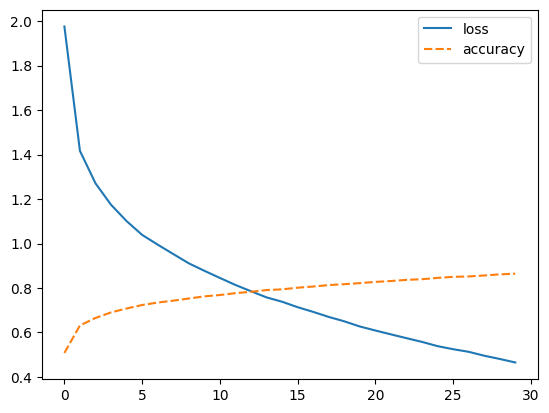

In [87]:
import pandas as pd
import seaborn as sns


df = pd.DataFrame(food_vision_model.history.history)
sns.lineplot(df)

In [88]:
test_dir = "data/food-101/test/"

In [90]:
test_images = image_dataset_from_directory(directory=test_dir,
                                         label_mode="categorical",
                                         batch_size=32,
                                         image_size=(256, 256)
                                         )

Found 25250 files belonging to 101 classes.


In [107]:
y_labels = []
for images, labels in test_images.unbatch(): # unbatch the test data and get images and labels
    y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[48, 55, 5, 11, 97, 84, 22, 72, 59, 49]

In [92]:
y_preds = food_vision_model.predict(test_images)

790/790 [==============================] - 428s 543ms/step


In [94]:
y_classes = y_preds.argmax(axis=1)

In [95]:
y_classes

array([51, 18, 21, ..., 36, 20, 73], dtype=int64)

In [129]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(100, 100), text_size=15, norm=False, savefig=False):  
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
  # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    plt.xticks(rotation=70, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

    if savefig:
        
        fig.savefig("confusion_matrix.png")

In [130]:
make_confusion_matrix(y_labels, y_classes, test_images.class_names, savefig=True)

In [131]:
food_vision_model.evaluate(test_images)

790/790 [==============================] - 83s 102ms/step - loss: 0.3803 - accuracy: 0.8827


[0.3803199529647827, 0.8826534748077393]

In [139]:
def load_and_prep_image(filename, img_shape=256, scale=True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 25ms/step


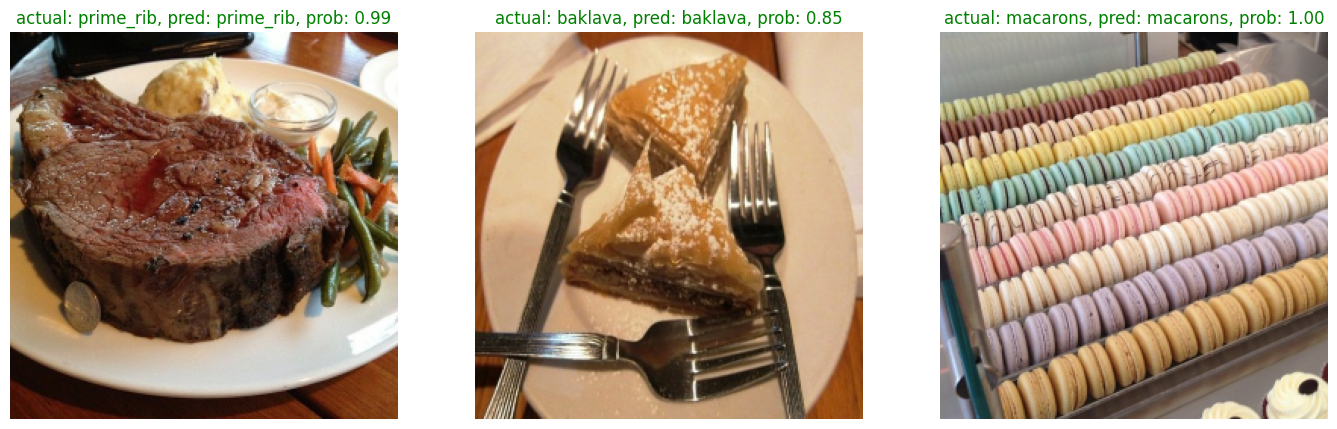

In [175]:
class_names = test_images.class_names
import os
import random

plt.figure(figsize=(17, 10))

for i in range(3):
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(data_dir + "/" + class_name))
    filepath = data_dir + class_name + "/" + filename

    img = load_and_prep_image(filepath, scale=False) 
    pred_prob = food_vision_model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[pred_prob.argmax()] 

    plt.subplot(1, 3, i+1)
    plt.imshow(img/255.)
    if class_name == pred_class: 
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
    plt.axis(False);